Pumpkin dataset visualization

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dataset = pd.read_csv('../data/US-pumpkins.csv')
print(dataset.head())

   City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0     

In [32]:
print(dataset.shape)
print(dataset.isnull().sum())

(1757, 26)
City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64


In [33]:
new_columns = ['Package', 'Low Price', 'High Price', 'Date']
dataset = dataset.drop([c for c in dataset.columns if c not in new_columns], axis=1)

In [34]:
dataset.head()

,Package,Date,Low Price,High Price
0,24 inch bins,4/29/17,270.0,280.0
1,24 inch bins,5/6/17,270.0,280.0
2,24 inch bins,9/24/16,160.0,160.0
3,24 inch bins,9/24/16,160.0,160.0
4,24 inch bins,11/5/16,90.0,100.0


In [35]:
month = pd.DatetimeIndex(dataset['Date']).month

In [36]:
month

Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1757)

In [37]:
dataset.drop('Date', inplace=True, axis=1)
dataset['month'] = month
dataset.head()

,Package,Low Price,High Price,month
0,24 inch bins,270.0,280.0,4
1,24 inch bins,270.0,280.0,5
2,24 inch bins,160.0,160.0,9
3,24 inch bins,160.0,160.0,9
4,24 inch bins,90.0,100.0,11


In [38]:
dataset['Price'] = (dataset['Low Price']+dataset['High Price'])/2

In [39]:
dataset.head()

,Package,Low Price,High Price,month,Price
0,24 inch bins,270.0,280.0,4,275.0
1,24 inch bins,270.0,280.0,5,275.0
2,24 inch bins,160.0,160.0,9,160.0
3,24 inch bins,160.0,160.0,9,160.0
4,24 inch bins,90.0,100.0,11,95.0


In [40]:
dataset = dataset[dataset['Package'].str.contains('bushel', case = True, regex = True)]

In [41]:
dataset.head()

,Package,Low Price,High Price,month,Price
70,1 1/9 bushel cartons,15.0,15.0,9,15.0
71,1 1/9 bushel cartons,18.0,18.0,9,18.0
72,1 1/9 bushel cartons,18.0,18.0,10,18.0
73,1 1/9 bushel cartons,17.0,17.0,10,17.0
74,1 1/9 bushel cartons,15.0,15.0,10,15.0


In [42]:
price = dataset['Price']
dataset.loc[dataset['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

dataset.loc[dataset['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [43]:
dataset.head()

,Package,Low Price,High Price,month,Price
70,1 1/9 bushel cartons,15.0,15.0,9,13.5
71,1 1/9 bushel cartons,18.0,18.0,9,16.2
72,1 1/9 bushel cartons,18.0,18.0,10,16.2
73,1 1/9 bushel cartons,17.0,17.0,10,15.3
74,1 1/9 bushel cartons,15.0,15.0,10,13.5


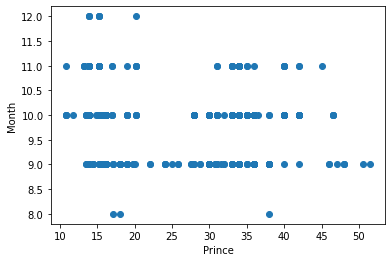

In [44]:
plt.scatter(dataset['Price'], dataset['month'])
plt.xlabel('Prince')
plt.ylabel('Month')
plt.show()

Text(0, 0.5, 'Price')

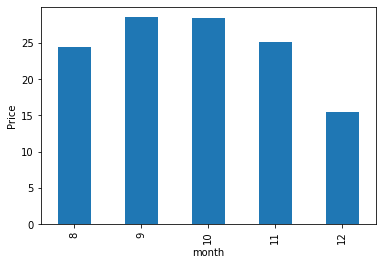

In [46]:
dataset.groupby(['month'])['Price'].mean().plot(kind = 'bar')
plt.ylabel('Price')

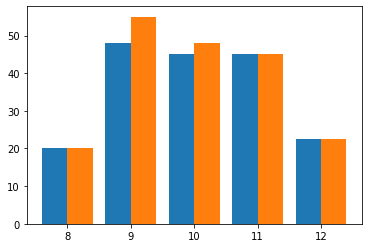

In [50]:
plt.bar(dataset.month-0.2, dataset['Low Price'], 0.4, label = 'Low')
plt.bar(dataset.month+0.2, dataset['High Price'], 0.4, label = 'High')
plt.show()

In [51]:
dataset.groupby('Package')
dataset.head()

,Package,Low Price,High Price,month,Price
70,1 1/9 bushel cartons,15.0,15.0,9,13.5
71,1 1/9 bushel cartons,18.0,18.0,9,16.2
72,1 1/9 bushel cartons,18.0,18.0,10,16.2
73,1 1/9 bushel cartons,17.0,17.0,10,15.3
74,1 1/9 bushel cartons,15.0,15.0,10,13.5


In [59]:
data = dataset.groupby('Package')['Package'].count()
d = dict(data)

<BarContainer object of 5 artists>

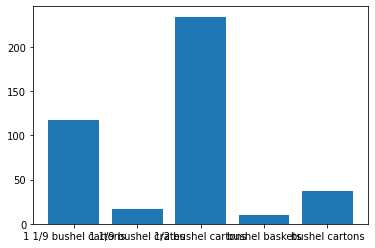

In [63]:
plt.bar(d.keys(), d.values())